# ANÁLISE FUNDAMENTALISTA USANDO PYTHON

### Biblioteca Fundamentus

1.0 - Importando a biblioteca

In [3]:
import fundamentus
import pandas as pd
import matplotlib.pyplot as plt

2.0 Screening (Conceito de filtro)

In [6]:
# A biblioteca só pega o resultado do último balanço apresentado das empresas

df = fundamentus.get_resultado()

In [9]:
# Conhecendo os dados

df.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,9.34,-3.86,1.28,0.976,0.0000,0.438,-3.43,-652.21,-0.89,-1180.91,17.42,-0.0015,-0.2460,-0.0007,-0.3311,0.55,8945870.0,8.653780e+08,1.15,0.0306
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1489,0.00,0.0,5.420810e+09,0.00,0.1728
ABCB4,18.40,5.15,0.77,0.000,0.0852,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1489,0.00,16011500.0,5.420810e+09,0.00,0.1728
ABEV3,14.21,15.68,2.63,2.707,0.0536,1.679,1106.39,13.74,-17.76,13.22,9.68,0.1970,0.1779,0.1576,0.1678,1.01,364862000.0,8.507460e+10,0.05,0.1416
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641


In [10]:
# Conhecendo todas as colunas

df.columns

Index(['cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit', 'pacl',
       'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe', 'liqc',
       'liq2m', 'patrliq', 'divbpatr', 'c5y'],
      dtype='object', name='Multiples')

In [11]:
# obetendo resultados de um ativo específico

df.loc['ABCB4']

Multiples
cotacao     1.840000e+01
pl          5.150000e+00
pvp         7.700000e-01
psr         0.000000e+00
dy          8.520000e-02
pa          0.000000e+00
pcg         0.000000e+00
pebit       0.000000e+00
pacl        0.000000e+00
evebit      0.000000e+00
evebitda    0.000000e+00
mrgebit     0.000000e+00
mrgliq      0.000000e+00
roic        0.000000e+00
roe         1.489000e-01
liqc        0.000000e+00
liq2m       1.601150e+07
patrliq     5.420810e+09
divbpatr    0.000000e+00
c5y         1.728000e-01
Name: ABCB4, dtype: float64

In [12]:
# obetendo um dado de um ativo específico

df.loc[['ABCB4'],['pl']]

Multiples,pl
papel,
ABCB4,5.15


In [13]:
# obetendo N dados de N ativos

df.loc[['ABCB4','BBDC3','BPAC11'],['pl','roe']]

Multiples,pl,roe
papel,,
ABCB4,5.15,0.1489
BBDC3,9.28,0.0969
BPAC11,14.81,0.1800


In [14]:
# obtendo dados de uma lista de ativos

setor = ['ABEV3','PETR4']

In [15]:
df.query('index in @setor')

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
ABEV3,14.21,15.68,2.63,2.707,0.0536,1.679,1106.39,13.74,-17.76,13.22,9.68,0.1970,0.1779,0.1576,0.1678,1.01,3.648620e+08,8.507460e+10,0.05,0.1416
PETR4,32.33,2.70,1.14,0.725,0.2862,0.426,-28.53,1.61,-0.88,2.45,1.91,0.4497,0.2699,0.2895,0.4219,0.90,1.568170e+09,3.706830e+11,0.75,0.1942


Vamos criar um filtro:

- P/L acima de 15
- DY acima de 5%

In [18]:
filtro = df[(df.pl > 15) & (df.dy > 0.05)]
filtro

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
ABEV3,14.21,15.68,2.63,2.707,0.0536,1.679,1106.39,13.74,-17.76,13.22,9.68,0.1970,0.1779,0.1576,0.1678,1.01,3.648620e+08,8.507460e+10,0.05,0.1416
AFLT3,9.37,22.72,2.36,8.171,0.0634,1.928,16.24,21.91,36.47,21.65,21.50,0.3729,0.3596,0.0934,0.1040,2.00,5.634810e+03,2.500120e+08,0.00,0.3008
AGRO3,24.25,63.00,1.22,2.181,0.1336,0.745,3.28,59.22,37.32,74.92,25.22,0.0368,0.0346,0.0143,0.0193,2.25,1.199070e+07,2.037980e+09,0.45,0.2994
ATOM3,2.33,25.11,2.85,2.067,0.1375,1.946,2.05,-178.35,2.95,-119.32,-325.51,-0.0116,0.0823,-0.0317,0.1136,34.11,5.031430e+04,1.943700e+07,0.00,0.2322
BEEF3,10.90,18.86,16.15,0.229,0.0505,0.333,1.69,3.06,-0.91,6.62,5.41,0.0747,0.0121,0.2021,0.8567,1.50,8.748450e+07,4.097820e+08,33.90,0.1773
BSLI3,14.77,17.55,2.35,0.000,3.0391,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1338,0.00,2.573560e+03,2.283600e+09,0.00,0.0157
CGAS3,116.02,34.38,155.92,0.894,0.1021,1.116,78.33,5.25,-1.85,7.16,6.05,0.1701,0.0260,0.2838,4.5346,1.04,6.500050e+03,9.861000e+07,77.86,0.2195
CGAS5,128.30,38.02,172.42,0.989,0.1015,1.234,86.62,5.81,-2.05,7.72,6.52,0.1701,0.0260,0.2838,4.5346,1.04,7.783580e+04,9.861000e+07,77.86,0.2195
CRIV4,5.70,22.45,0.55,0.000,0.0842,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.0247,0.00,8.621880e+03,1.059150e+09,0.00,0.0298


In [19]:
filtro.shape

(16, 20)

<BarContainer object of 967 artists>

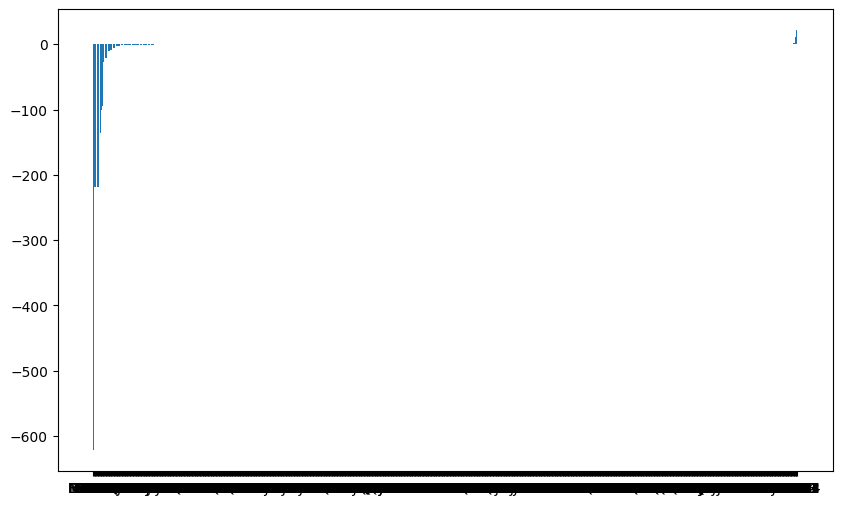

In [23]:
plt.figure(figsize= (10,6))
df.sort_values('mrgebit', inplace = True)
plt.bar(df.index, df.mrgebit)

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_22812\3373652486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro.sort_values('mrgebit', inplace = True)


<BarContainer object of 16 artists>

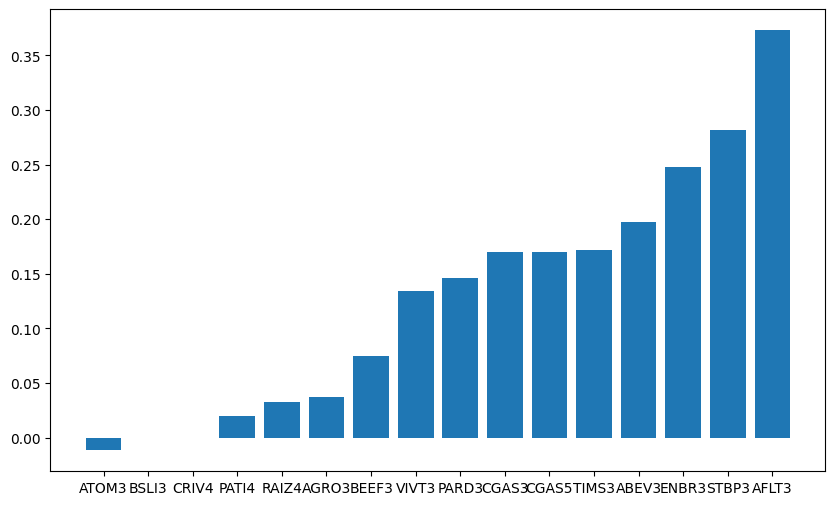

In [25]:
plt.figure(figsize= (10,6))
filtro.sort_values('mrgebit', inplace = True)
plt.bar(filtro.index, filtro.mrgebit)

In [28]:
filtro2 = df[(df.pl > 0) & (df.dy > 0.05) & (df.mrgebit > 0.3)]
filtro2

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
CMIN3,4.14,9.48,2.17,1.491,0.2199,0.863,3.42,4.72,-4.24,4.66,3.84,0.3160,0.1573,0.2849,0.2289,2.73,2.729650e+07,1.046460e+10,0.72,-0.1759
KLBN3,4.61,5.70,2.20,1.315,0.0607,0.526,4.82,4.06,-1.11,7.12,4.80,0.3236,0.2694,0.1576,0.3854,1.86,1.765800e+06,1.178430e+10,2.17,0.1926
KLBN11,22.87,5.66,2.18,1.305,0.0612,0.522,4.79,4.03,-1.10,7.09,4.78,0.3236,0.2694,0.1576,0.3854,1.86,1.048230e+08,1.178430e+10,2.17,0.1926
KLBN4,4.58,5.67,2.18,1.306,0.0611,0.522,4.79,4.04,-1.10,7.10,4.78,0.3236,0.2694,0.1576,0.3854,1.86,1.020260e+07,1.178430e+10,2.17,0.1926
RANI3,10.58,5.29,2.03,1.579,0.0834,0.690,2.94,4.85,-2.39,6.68,5.60,0.3257,0.2987,0.1949,0.3849,2.70,9.063100e+06,1.281240e+09,1.44,0.1854
JHSF3,4.99,7.96,0.67,2.023,0.0850,0.318,1.48,5.79,-1.66,9.88,8.98,0.3492,0.2628,0.0588,0.0846,3.42,1.624440e+07,5.036340e+09,0.61,0.3722
AFLT3,9.37,22.72,2.36,8.171,0.0634,1.928,16.24,21.91,36.47,21.65,21.50,0.3729,0.3596,0.0934,0.1040,2.00,5.634810e+03,2.500120e+08,0.00,0.3008
VALE3,62.96,5.02,1.53,1.384,0.0644,0.648,29.79,3.66,-1.66,4.21,3.50,0.3778,0.2780,0.1992,0.3045,1.15,1.814230e+09,1.869880e+11,0.36,0.1303
FIBR3,66.30,12.03,2.59,2.010,0.0759,0.899,9.59,5.13,-2.54,7.17,5.29,0.3918,0.1675,0.2295,0.2157,1.46,0.000000e+00,1.414900e+10,1.46,0.2271


In [29]:
filtro2.shape

(25, 20)

In [30]:
filtro2.sort_values('dy', ascending= False, inplace= True)

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_22812\2515920262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro2.sort_values('dy', ascending= False, inplace= True)


Text(0.5, 1.0, 'Ações com P/L maior que 0, margem Ebit maior que 30% e DY acima de 5%, ordenadas por DY')

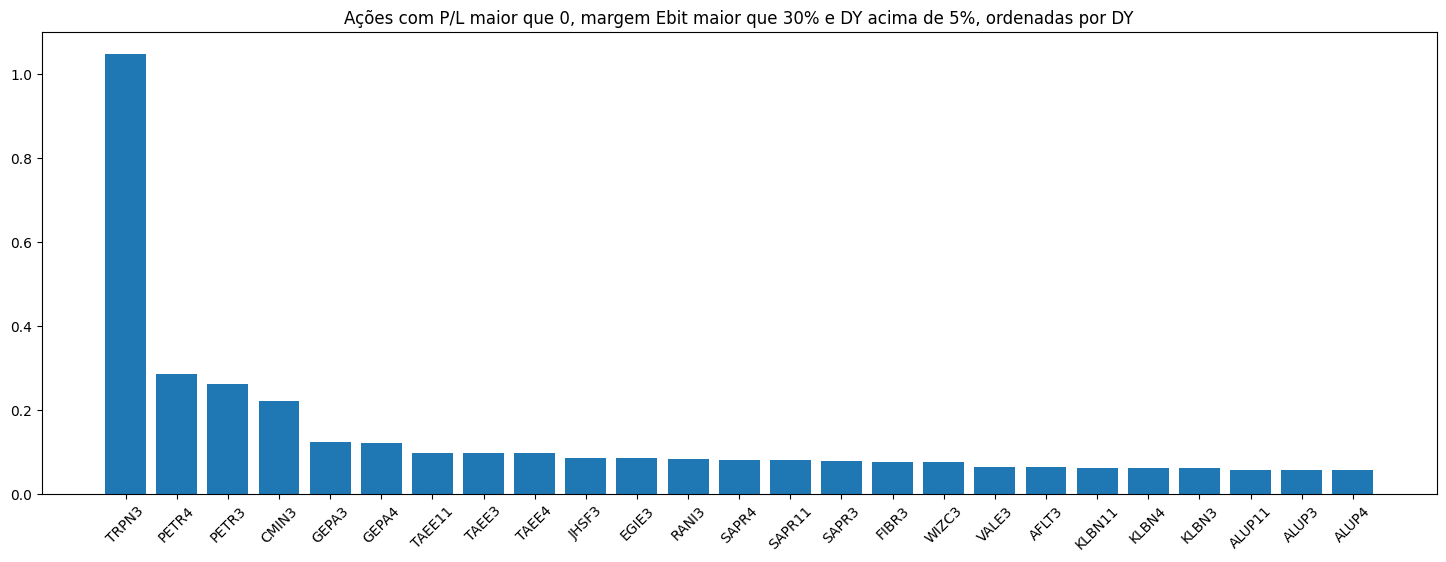

In [31]:
plt.figure(figsize= (18,6))
plt.bar(filtro2.index, filtro2.dy) # eixo y
plt.xticks(rotation = 45) # rotacionando o label do eixo x na vertical
plt.title('Ações com P/L maior que 0, margem Ebit maior que 30% e DY acima de 5%, ordenadas por DY')
